In [1]:
import json

In [2]:
standard_json_path = '/capstor/users/cscs/xyixuan/PDM/results/lm_eval/llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_10200350/__iopsstor__scratch__cscs__xyixuan__experiment__llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_10200350__results__HF/results_2025-02-06T10-47-52.191208.json'
k50_h50_json_path  = '/capstor/users/cscs/xyixuan/PDM/results/lm_eval/llama_1.5B_Sparse_Gutenberg_K_50_H_50_GBS_60_SEQ_10200350/__iopsstor__scratch__cscs__xyixuan__experiment__llama_1.5B_Sparse_Gutenberg_K_50_H_50_GBS_60_SEQ_10200350__results__HF/results_2025-02-06T10-44-21.309266.json'
k50_h13_json_path  = '/capstor/users/cscs/xyixuan/PDM/results/lm_eval/llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_10200350/__iopsstor__scratch__cscs__xyixuan__experiment__llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_10200350__results__HF/results_2025-02-06T10-31-30.385362.json'

In [20]:
standard_json_path = '/capstor/users/cscs/xyixuan/PDM/results/lm_eval/llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350/__iopsstor__scratch__cscs__xyixuan__experiment__llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350__results__HF/results_2025-02-04T07-16-14.656057.json'
k50_h50_json_path  = '/capstor/users/cscs/xyixuan/PDM/results/lm_eval/llama_1.5B_Sparse_Gutenberg_K_50_H_50_GBS_60_SEQ_11971350/__iopsstor__scratch__cscs__xyixuan__experiment__llama_1.5B_Sparse_Gutenberg_K_50_H_50_GBS_60_SEQ_11971350__results__HF/results_2025-02-04T07-08-44.522292.json'
k50_h13_json_path  = '/capstor/users/cscs/xyixuan/PDM/results/lm_eval/llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_11971350/__iopsstor__scratch__cscs__xyixuan__experiment__llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_11971350__results__HF/results_2025-02-04T07-12-25.407888.json'

In [21]:
with open(standard_json_path, 'r') as file:
    result = json.load(file)

In [22]:
result['results']['hellaswag']

{'alias': 'hellaswag',
 'acc,none': 0.385381398127863,
 'acc_stderr,none': 0.004856906473719392,
 'acc_norm,none': 0.48824935271858194,
 'acc_norm_stderr,none': 0.004988403265931458}

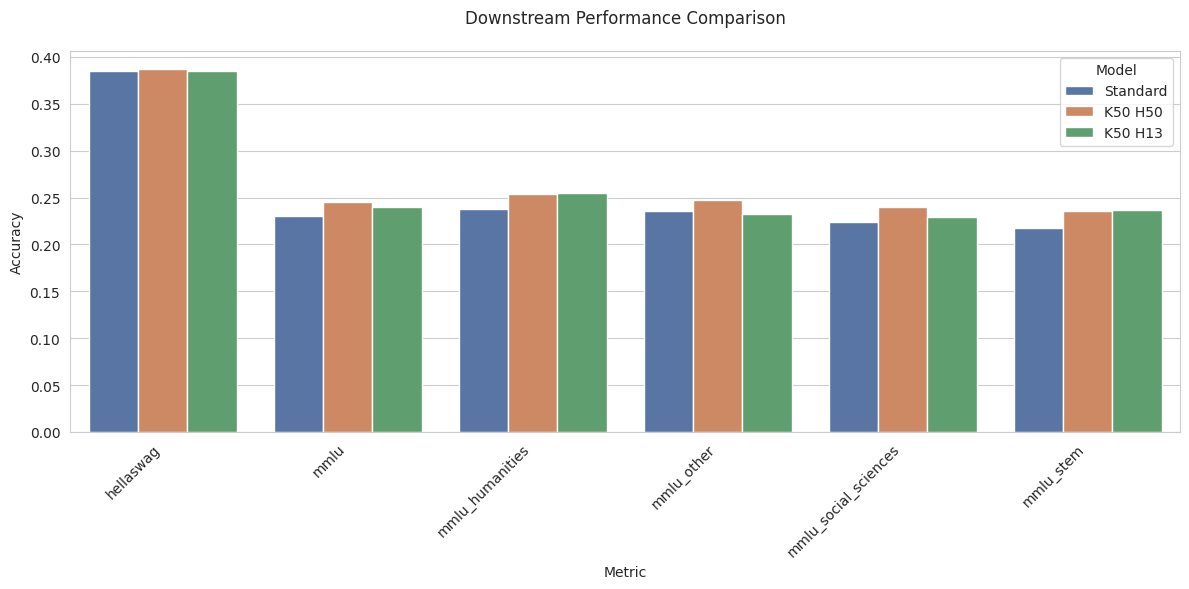

In [23]:
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Function to load results and stderr values
def load_results_with_stderr(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
    
    # Extract metrics and their standard errors
    metrics = {
        'hellaswag': {
            'acc': data['results']['hellaswag']['acc,none'],
            'stderr': data['results']['hellaswag']['acc_stderr,none']
        },
        'mmlu': {
            'acc': data['groups']['mmlu']['acc,none'],
            'stderr': data['groups']['mmlu']['acc_stderr,none']
        },
        'mmlu_humanities': {
            'acc': data['groups']['mmlu_humanities']['acc,none'],
            'stderr': data['groups']['mmlu_humanities']['acc_stderr,none']
        },
        'mmlu_other': {
            'acc': data['groups']['mmlu_other']['acc,none'],
            'stderr': data['groups']['mmlu_other']['acc_stderr,none']
        },
        'mmlu_social_sciences': {
            'acc': data['groups']['mmlu_social_sciences']['acc,none'],
            'stderr': data['groups']['mmlu_social_sciences']['acc_stderr,none']
        },
        'mmlu_stem': {
            'acc': data['groups']['mmlu_stem']['acc,none'],
            'stderr': data['groups']['mmlu_stem']['acc_stderr,none']
        }
    }
    return metrics

# Load data for each experiment
standard_results = load_results_with_stderr(standard_json_path)
k50_h50_results = load_results_with_stderr(k50_h50_json_path)
k50_h13_results = load_results_with_stderr(k50_h13_json_path)

# Prepare data for seaborn
data_list = []
for metric in standard_results.keys():
    # Standard model
    data_list.append({
        'Metric': metric,
        'Model': 'Standard',
        'Accuracy': standard_results[metric]['acc'],
        'Stderr': standard_results[metric]['stderr']
    })
    # K50 H50 model
    data_list.append({
        'Metric': metric,
        'Model': 'K50 H50',
        'Accuracy': k50_h50_results[metric]['acc'],
        'Stderr': k50_h50_results[metric]['stderr']
    })
    # K50 H13 model
    data_list.append({
        'Metric': metric,
        'Model': 'K50 H13',
        'Accuracy': k50_h13_results[metric]['acc'],
        'Stderr': k50_h13_results[metric]['stderr']
    })

# Convert to DataFrame
df = pd.DataFrame(data_list)

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the plot
ax = sns.barplot(
    data=df,
    x='Metric',
    y='Accuracy',
    hue='Model',
    capsize=0.05,  # Error bar cap size
    palette='deep'  # You can change the palette (e.g., 'muted', 'pastel', 'deep', 'colorblind')
)

# Customize the plot
plt.title('Downstream Performance Comparison', pad=20)
plt.xlabel('Metric')
plt.ylabel('Accuracy')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save and show the plot
# plt.savefig('model_comparison_seaborn.png', dpi=300, bbox_inches='tight')
plt.show()